In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

### 물가정보 불러오기

In [3]:
target = pd.read_csv('신라면2.csv', index_col=False, thousands = ',')[['날짜','price']]
target['t'] = target['price'].str.replace(',', '')
target.drop('price', axis=1, inplace=True)
target = target[::-1]
target.loc[135] = ['2022년 4월', target.loc[0, 't']]
target.reset_index(inplace=True, drop=True)
target

,날짜,t
0,2011년 1월,-
1,2011년 2월,-
2,2011년 3월,2926
3,2011년 4월,2942
4,2011년 5월,2933
...,...,...
131,2021년 12월,3809
132,2022년 1월,3807
133,2022년 2월,3806
134,2022년 3월,3800


### 원자재 정보 불러오기

In [4]:
def make_df(csv_filename):
    df = pd.read_csv(csv_filename+' 선물내역.csv', thousands = ',')[['날짜', '종가', '거래량', '변동 %']]
    df['거래량'] = df['거래량'].str.replace('K','')
    df['변동 %'] = df['변동 %'].str.replace('%','')
    feature=['날짜', csv_filename+'종가', csv_filename+'거래량', csv_filename+'변동 %',]
    df = df[::-1]
    df.reset_index(inplace=True, drop=True)

    df = df.astype({
        '종가':'float64',
    })
    df.columns = feature
    return df
    
df1 = make_df('런던설탕')
df2 = make_df('런던소맥')
df3 = make_df('미국대두유')
df4 = make_df('미국소맥')
df5 = make_df('미국팜유')

In [5]:
df1

,날짜,런던설탕종가,런던설탕거래량,런던설탕변동 %
0,2011년 1월,811.6,78.07,4.39
1,2011년 2월,743.8,87.75,-8.35
2,2011년 3월,711.7,89.26,-4.32
3,2011년 4월,615.1,74.98,-13.57
4,2011년 5월,672.0,67.93,9.25
...,...,...,...,...
131,2021년 12월,497.1,64.34,2.37
132,2022년 1월,492.5,99.29,-0.93
133,2022년 2월,496.0,102.80,0.71
134,2022년 3월,541.5,119.60,9.17


In [6]:
type(df1), type(df2), type(df3),type(df4),type(df5)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [7]:
result = df1.merge(df2, on='날짜').merge(df3, on='날짜').merge(df4, on='날짜').merge(df5, on='날짜').merge(target, on='날짜')
result['날짜'] = pd.to_datetime(result['날짜'], format='%Y년 %m월')
result = result.replace('-', np.NaN)
result

,날짜,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥거래량,미국소맥변동 %,미국팜유종가,미국팜유거래량,미국팜유변동 %,t
0,2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532.79,0.24,838.63,NaN,5.80,1255.25,NaN,1.56,NaN
1,2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1.00M,-1.92,816.38,NaN,-2.65,1164.00,NaN,-7.27,NaN
2,2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763.57,3.54,759.13,NaN,-7.01,1116.50,NaN,-4.08,2926
3,2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914.89,-1.11,804.13,NaN,5.93,1138.00,NaN,1.93,2942
4,2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583.59,0.62,787.13,NaN,-2.11,1153.00,NaN,1.32,2933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2021-12-01,497.1,64.34,2.37,220.25,NaN,-1.91,56.30,290.59,2.16,770.75,480.19,-0.39,1238.75,NaN,0.53,3809
132,2022-01-01,492.5,99.29,-0.93,214.75,NaN,-2.50,64.82,502.08,15.13,761.25,44.59,-1.23,1381.00,NaN,11.48,3807
133,2022-02-01,496.0,102.80,0.71,250.55,NaN,16.67,72.89,817.30,12.45,928.00,1.06M,21.90,1774.75,NaN,28.51,3806
134,2022-03-01,541.5,119.60,9.17,307.50,0.81,22.73,69.94,497.88,-4.05,1006.00,0.15,8.41,1519.75,NaN,-14.37,3800


## 결측치 확인하기

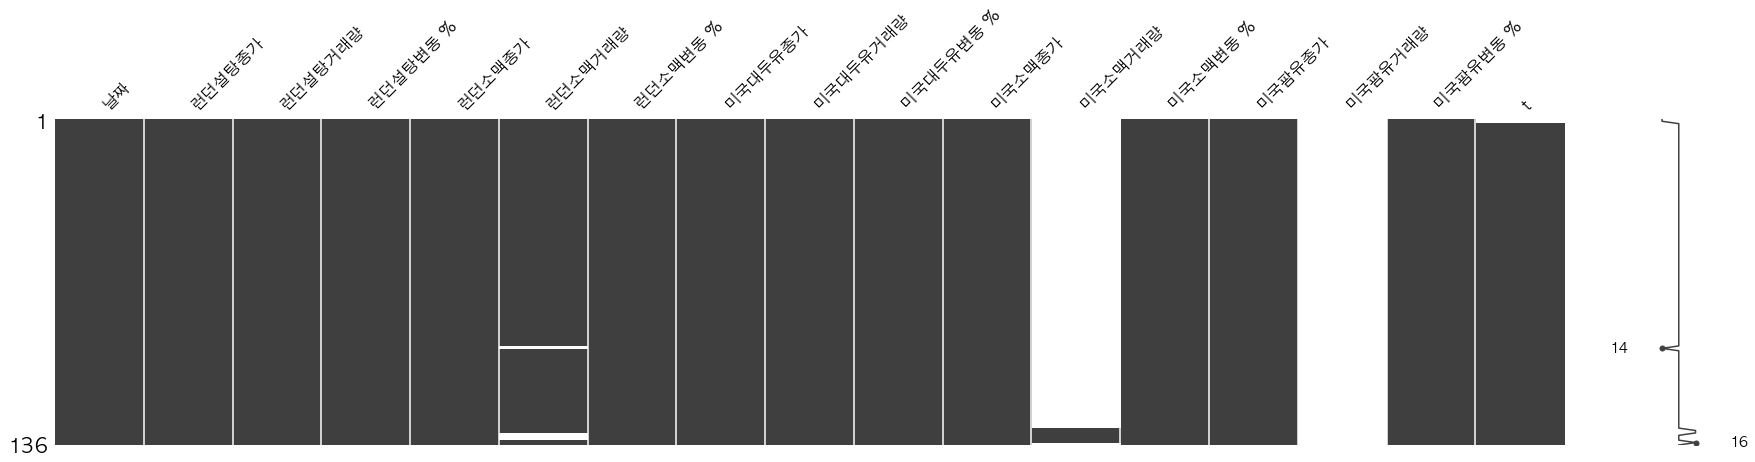

In [8]:
import missingno as msno

msno.matrix(df=result, figsize=(30,6))
plt.show()

- 미국 소맥거래량과 미국팜유거래량의 결측치가 과도하게 높으므로 해당 열을 삭제

In [9]:
result.drop(['미국소맥거래량', '미국팜유거래량'], axis=1, inplace=True)

- 나머지 자료들에 대해선 삭제하지 않고 시계열 자료임을 고려해서 주변값으로 채움.

In [10]:
result.fillna(method='ffill', inplace=True)
result.fillna(method='bfill', inplace=True)

In [11]:
result.isna().sum()

날짜           0
런던설탕종가       0
런던설탕거래량      0
런던설탕변동 %     0
런던소맥종가       0
런던소맥거래량      0
런던소맥변동 %     0
미국대두유종가      0
미국대두유거래량     0
미국대두유변동 %    0
미국소맥종가       0
미국소맥변동 %     0
미국팜유종가       0
미국팜유변동 %     0
t            0
dtype: int64

In [12]:
result

,날짜,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥변동 %,미국팜유종가,미국팜유변동 %,t
0,2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532.79,0.24,838.63,5.80,1255.25,1.56,2926
1,2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1.00M,-1.92,816.38,-2.65,1164.00,-7.27,2926
2,2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763.57,3.54,759.13,-7.01,1116.50,-4.08,2926
3,2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914.89,-1.11,804.13,5.93,1138.00,1.93,2942
4,2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583.59,0.62,787.13,-2.11,1153.00,1.32,2933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2021-12-01,497.1,64.34,2.37,220.25,0.08,-1.91,56.30,290.59,2.16,770.75,-0.39,1238.75,0.53,3809
132,2022-01-01,492.5,99.29,-0.93,214.75,0.08,-2.50,64.82,502.08,15.13,761.25,-1.23,1381.00,11.48,3807
133,2022-02-01,496.0,102.80,0.71,250.55,0.08,16.67,72.89,817.30,12.45,928.00,21.90,1774.75,28.51,3806
134,2022-03-01,541.5,119.60,9.17,307.50,0.81,22.73,69.94,497.88,-4.05,1006.00,8.41,1519.75,-14.37,3800


- 거래량의 단위가 M과 K가 있었는데 K만 일괄적으로 제거하여 M은 남아있음.
- 이 부분을 처리해줌

In [13]:
def M_to_K(x):
    if 'M' in x:
        x = float(x[:-1])*1000000
    else:
        x = float(x)*1000
    return str(x)
result['미국대두유거래량'] = result['미국대두유거래량'].apply(M_to_K)

- 숫자형 변수여야할 변수들을 수자형 변수로 지정하여줌

In [14]:
result = result.astype({
    '런던설탕거래량':'float64',
    '런던설탕변동 %':'float64',
    '런던소맥거래량':'float64',
    '런던소맥변동 %':'float64',
    '미국소맥변동 %':'float64',
    '미국대두유거래량':'float64',
    '미국대두유변동 %':'float64',
    '미국팜유변동 %':'float64',
    't':'float64'
})

## 상관관계


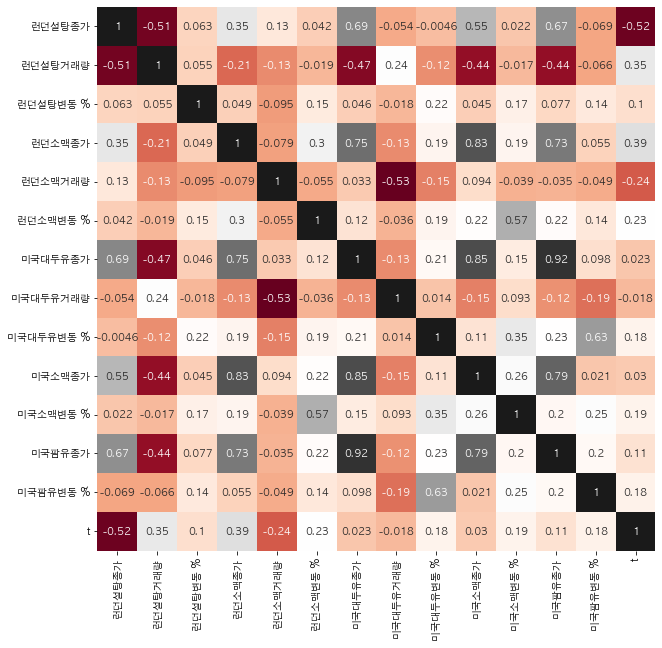

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(result.corr(), annot=True, cmap='RdGy', cbar=False)
plt.savefig('savefig_default.png')
plt.show()


In [16]:
sns.pairplot(result)

Error in callback <function flush_figures at 0x11d0494c0> (for post_execute):


KeyboardInterrupt: 

### scaling하여서 변수 변화보기

In [17]:
from sklearn.preprocessing import MinMaxScaler

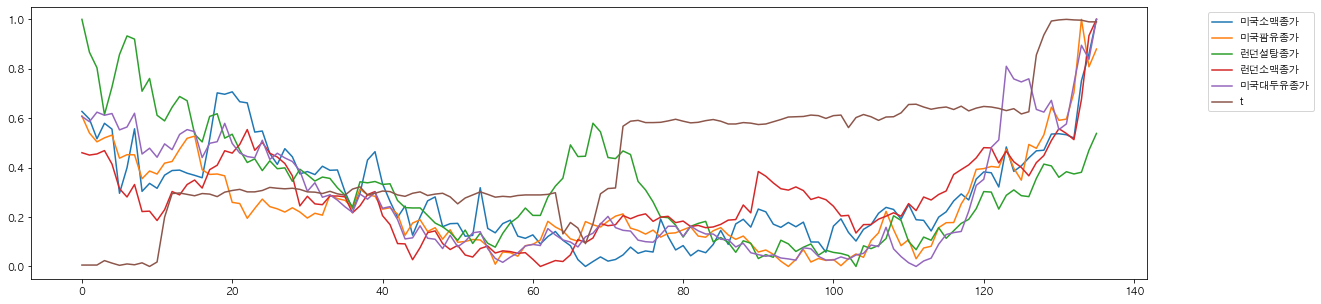

In [18]:
scaler2 = MinMaxScaler()
scaled = result.copy()
features2 = list(scaled)
scale_features2 = list(features2)
scale_features2.remove('날짜')
scaled[scale_features2] = scaler2.fit_transform(scaled[scale_features2])
scaled = pd.DataFrame(scaled)
scaled.index = scaled.index

scaled.columns = features2
scaled.loc[:,['미국소맥종가', '미국팜유종가', '런던설탕종가', '런던소맥종가', '미국대두유종가', 't']].plot(figsize=(20,5))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

- 유사한 형태로 생긴 그래프들이 있는 것으로 보아 다중 공선성 체크가 필요하다.

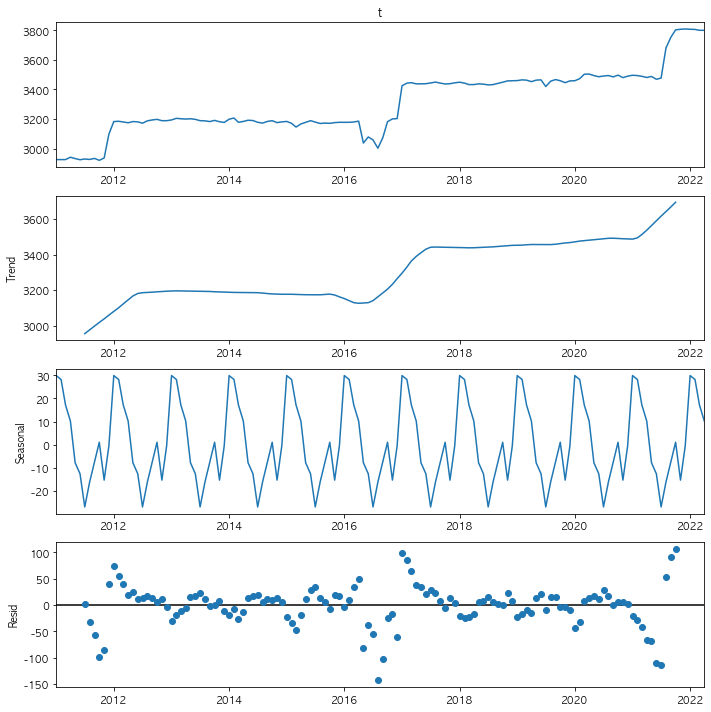

날짜
2011-01-01   NaN
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
              ..
2021-12-01   NaN
2022-01-01   NaN
2022-02-01   NaN
2022-03-01   NaN
2022-04-01   NaN
Name: trend, Length: 136, dtype: float64
날짜
2011-01-01    29.885669
2011-02-01    28.164836
2011-03-01    17.210669
2011-04-01    10.223169
2011-05-01    -7.776831
                ...    
2021-12-01    -0.468497
2022-01-01    29.885669
2022-02-01    28.164836
2022-03-01    17.210669
2022-04-01    10.223169
Name: seasonal, Length: 136, dtype: float64
날짜
2011-01-01   NaN
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
              ..
2021-12-01   NaN
2022-01-01   NaN
2022-02-01   NaN
2022-03-01   NaN
2022-04-01   NaN
Name: resid, Length: 136, dtype: float64


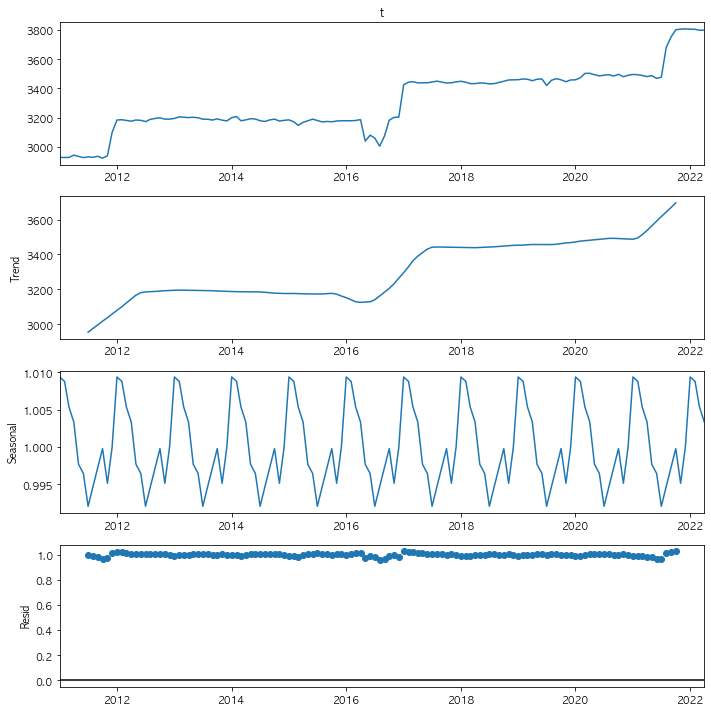

날짜
2011-01-01   NaN
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
              ..
2021-12-01   NaN
2022-01-01   NaN
2022-02-01   NaN
2022-03-01   NaN
2022-04-01   NaN
Name: trend, Length: 136, dtype: float64
날짜
2011-01-01    1.009374
2011-02-01    1.008784
2011-03-01    1.005363
2011-04-01    1.003337
2011-05-01    0.997699
                ...   
2021-12-01    0.999983
2022-01-01    1.009374
2022-02-01    1.008784
2022-03-01    1.005363
2022-04-01    1.003337
Name: seasonal, Length: 136, dtype: float64
날짜
2011-01-01   NaN
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
              ..
2021-12-01   NaN
2022-01-01   NaN
2022-02-01   NaN
2022-03-01   NaN
2022-04-01   NaN
Name: resid, Length: 136, dtype: float64


In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_dt = result.copy()
result_dt.index = result_dt['날짜']
result_dt.drop(columns='날짜', axis=1, inplace=True)
sda = seasonal_decompose(result_dt['t'], model='additive')
plt.rcParams['figure.figsize'] = [10, 10]
sda.plot()
plt.show()

trend = sda.trend
seasonal = sda.seasonal
residual = sda.resid

print(trend)
print(seasonal)
print(residual)

sdm = seasonal_decompose(result_dt['t'], model='multiplicative')
sdm.plot()
plt.show()

trend = sdm.trend
seasonal = sdm.seasonal
residual = sdm.resid

print(trend)
print(seasonal)
print(residual)
# 딥러닝(LSTM)
# 평가지표 : RMSE, MAPE
# 물가예측 머신러닝
# 


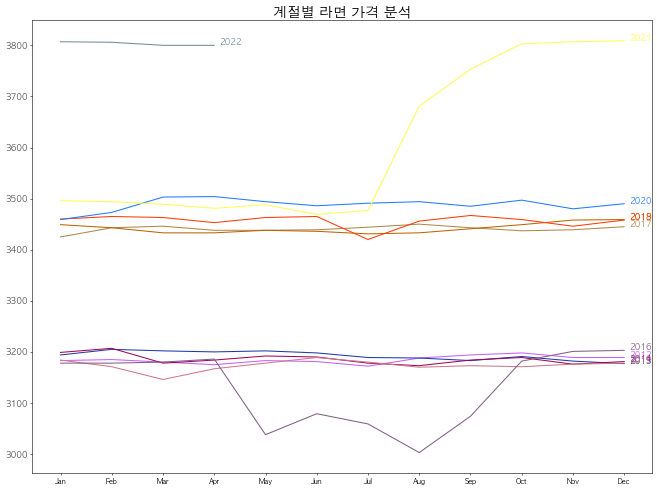

In [157]:

result_dt.reset_index(inplace=True)

result_dt['year'] = [d.year for d in result_dt['날짜']]
result_dt['month'] = [d.strftime('%b') for d in result_dt['날짜']]
years = result_dt['year'].unique()

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

plt.figure(figsize=(16,12), dpi=50)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 't', data=result_dt[result_dt.year==y], color=mycolors[i], label=y)
        plt.text(result_dt[result_dt.year==y].shape[0]-0.9, result_dt.loc[result_dt.year==y, 't'][-1:].values[0], y, fontsize=12, color=mycolors[i])

plt.yticks(fontsize=12, alpha=.7)
plt.title("계절별 라면 가격 분석", fontsize=20)
plt.show()


### Dicky Fuller test

In [158]:
dtdata = result.set_index('날짜')
dtdata.index.freq='MS'

In [159]:
from statsmodels.tsa.stattools import adfuller

In [160]:
dftest = adfuller(dtdata['t'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Stastics', 'p-value', '# lags Used','# Observations' ])

In [161]:
dftest

(-0.7915168904461197,
 0.8216012252423155,
 5,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 1219.6792666025585)

In [162]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [163]:
dfout

ADF Test Stastics        -0.791517
p-value                   0.821601
# lags Used               5.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

### Granger Casuality test

In [164]:
list(dtdata)

['런던설탕종가',
 '런던설탕거래량',
 '런던설탕변동 %',
 '런던소맥종가',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유종가',
 '미국대두유거래량',
 '미국대두유변동 %',
 '미국소맥종가',
 '미국소맥변동 %',
 '미국팜유종가',
 '미국팜유변동 %',
 't']

In [193]:
from statsmodels.tsa.stattools import grangercausalitytests
Min = 1
min_idx = 0
for i in range(1, 16):
    value =  grangercausalitytests(dtdata[['t', '런던설탕종가']], maxlag=15)[i][0]['ssr_ftest'][1]
    if Min > value:
        min_idx = i
        Min = value
print(min_idx, Min)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0840  , p=0.1512  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=2.1314  , p=0.1443  , df=1
likelihood ratio test: chi2=2.1147  , p=0.1459  , df=1
parameter F test:         F=2.0840  , p=0.1512  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5781  , p=0.5624  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=1.2010  , p=0.5485  , df=2
likelihood ratio test: chi2=1.1956  , p=0.5500  , df=2
parameter F test:         F=0.5781  , p=0.5624  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5383  , p=0.2078  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=4.8714  , p=0.1815  , df=3
likelihood ratio test: chi2=4.7843  , p=0.1883  , df=3
parameter F test:         F=1.5383  , p=0.2078  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8764  , p=0.4803  

In [166]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(dtdata[['t', '런던소맥종가']], maxlag=15);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1324  , p=0.7165  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=0.1354  , p=0.7129  , df=1
likelihood ratio test: chi2=0.1353  , p=0.7130  , df=1
parameter F test:         F=0.1324  , p=0.7165  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1736  , p=0.8408  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=0.3606  , p=0.8350  , df=2
likelihood ratio test: chi2=0.3601  , p=0.8352  , df=2
parameter F test:         F=0.1736  , p=0.8408  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1490  , p=0.9302  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=0.4718  , p=0.9250  , df=3
likelihood ratio test: chi2=0.4710  , p=0.9252  , df=3
parameter F test:         F=0.1490  , p=0.9302  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1065  , p=0.9801  

In [167]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(dtdata[['t', '미국대두유종가']], maxlag=15);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3597  , p=0.1269  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=2.4133  , p=0.1203  , df=1
likelihood ratio test: chi2=2.3920  , p=0.1220  , df=1
parameter F test:         F=2.3597  , p=0.1269  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0026  , p=0.3698  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=2.0829  , p=0.3529  , df=2
likelihood ratio test: chi2=2.0668  , p=0.3558  , df=2
parameter F test:         F=1.0026  , p=0.3698  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0606  , p=0.3684  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=3.3586  , p=0.3396  , df=3
likelihood ratio test: chi2=3.3169  , p=0.3453  , df=3
parameter F test:         F=1.0606  , p=0.3684  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7867  , p=0.5359  

In [168]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(dtdata[['t', '미국소맥종가']], maxlag=15);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0351  , p=0.8517  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=0.0359  , p=0.8497  , df=1
likelihood ratio test: chi2=0.0359  , p=0.8497  , df=1
parameter F test:         F=0.0351  , p=0.8517  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1229  , p=0.8845  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=0.2553  , p=0.8802  , df=2
likelihood ratio test: chi2=0.2551  , p=0.8803  , df=2
parameter F test:         F=0.1229  , p=0.8845  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0704  , p=0.9757  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=0.2229  , p=0.9738  , df=3
likelihood ratio test: chi2=0.2227  , p=0.9738  , df=3
parameter F test:         F=0.0704  , p=0.9757  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5098  , p=0.7286  

In [169]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(dtdata[['t', '미국팜유종가']], maxlag=15);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9797  , p=0.1618  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=2.0247  , p=0.1548  , df=1
likelihood ratio test: chi2=2.0097  , p=0.1563  , df=1
parameter F test:         F=1.9797  , p=0.1618  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9522  , p=0.1461  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=4.0558  , p=0.1316  , df=2
likelihood ratio test: chi2=3.9956  , p=0.1356  , df=2
parameter F test:         F=1.9522  , p=0.1461  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3252  , p=0.2692  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=4.1965  , p=0.2410  , df=3
likelihood ratio test: chi2=4.1317  , p=0.2476  , df=3
parameter F test:         F=1.3252  , p=0.2692  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9362  , p=0.4454  

In [170]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(dtdata[['t', '미국팜유종가']], maxlag=15);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9797  , p=0.1618  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=2.0247  , p=0.1548  , df=1
likelihood ratio test: chi2=2.0097  , p=0.1563  , df=1
parameter F test:         F=1.9797  , p=0.1618  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9522  , p=0.1461  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=4.0558  , p=0.1316  , df=2
likelihood ratio test: chi2=3.9956  , p=0.1356  , df=2
parameter F test:         F=1.9522  , p=0.1461  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3252  , p=0.2692  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=4.1965  , p=0.2410  , df=3
likelihood ratio test: chi2=4.1317  , p=0.2476  , df=3
parameter F test:         F=1.3252  , p=0.2692  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9362  , p=0.4454  

In [171]:
list(dtdata)

['런던설탕종가',
 '런던설탕거래량',
 '런던설탕변동 %',
 '런던소맥종가',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유종가',
 '미국대두유거래량',
 '미국대두유변동 %',
 '미국소맥종가',
 '미국소맥변동 %',
 '미국팜유종가',
 '미국팜유변동 %',
 't']

### Seasonal Plot

In [172]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

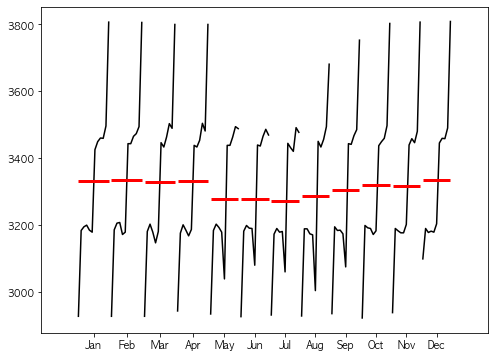

In [173]:
plt.rcParams["figure.figsize"] = (8,6)
month_plot(dtdata['t']);

- 가격이 환번 오른뒤로 아직 5월 6월 7월이 오지 않음.
- 계절성의 영향은 크지 않은것으로 보임.

In [174]:
dtdataQ = dtdata.resample(rule='Q').mean()

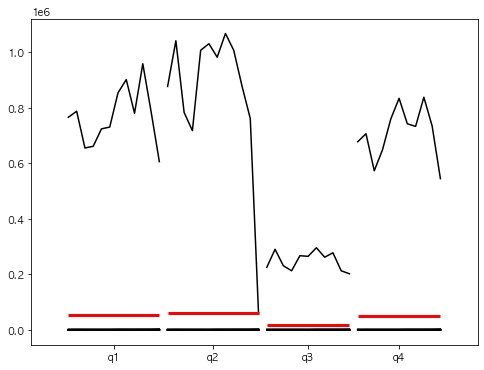

In [175]:
quarter_plot(dtdataQ);

In [176]:
# 다중 공선성 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [177]:
result

,날짜,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥변동 %,미국팜유종가,미국팜유변동 %,t
0,2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532790.0,0.24,838.63,5.80,1255.25,1.56,2926.0
1,2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1000000.0,-1.92,816.38,-2.65,1164.00,-7.27,2926.0
2,2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763570.0,3.54,759.13,-7.01,1116.50,-4.08,2926.0
3,2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914890.0,-1.11,804.13,5.93,1138.00,1.93,2942.0
4,2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583590.0,0.62,787.13,-2.11,1153.00,1.32,2933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2021-12-01,497.1,64.34,2.37,220.25,0.08,-1.91,56.30,290590.0,2.16,770.75,-0.39,1238.75,0.53,3809.0
132,2022-01-01,492.5,99.29,-0.93,214.75,0.08,-2.50,64.82,502080.0,15.13,761.25,-1.23,1381.00,11.48,3807.0
133,2022-02-01,496.0,102.80,0.71,250.55,0.08,16.67,72.89,817300.0,12.45,928.00,21.90,1774.75,28.51,3806.0
134,2022-03-01,541.5,119.60,9.17,307.50,0.81,22.73,69.94,497880.0,-4.05,1006.00,8.41,1519.75,-14.37,3800.0


In [178]:
list(result)

['날짜',
 '런던설탕종가',
 '런던설탕거래량',
 '런던설탕변동 %',
 '런던소맥종가',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유종가',
 '미국대두유거래량',
 '미국대두유변동 %',
 '미국소맥종가',
 '미국소맥변동 %',
 '미국팜유종가',
 '미국팜유변동 %',
 't']

In [179]:
def slidingwindow(data, feature, length, is_diff=False):
    df = data.copy()
    for i in range(1, length+1):
        df[feature+'-'+str(i)] = df[feature].shift(i)
        df[feature+'-'+str(i)] = df[feature+'-'+str(i)].astype('float64')
    
    if is_diff:
        df[feature+'1년증가량'] = df[feature+'-1']-df[feature+'-'+str(length)]
    
    return df

In [180]:
lagg_features = ['런던설탕종가', '런던소맥종가', '미국대두유종가', '미국소맥종가', '미국팜유종가']
feature_lag12 = result.copy()
feature_lag7_slidingx = result.copy()

for feature in lagg_features:
    feature_lag12 = slidingwindow(feature_lag12, feature, 12, is_diff=True)
feature_lag12.fillna(method='ffill', inplace=True)
feature_lag12.fillna(method='bfill', inplace=True)

In [181]:
import statsmodels.api as sm
features = list(feature_lag12)
features.remove('t')
features.remove('날짜')
model = sm.OLS(feature_lag12['t'], feature_lag12[features])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      t   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              233.9
Date:                Thu, 05 May 2022   Prob (F-statistic):                    2.36e-54
Time:                        17:09:04   Log-Likelihood:                         -904.18
No. Observations:                 136   AIC:                                      1964.
Df Residuals:                      58   BIC:                                      2192.
Df Model:                          78                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [182]:
from sklearn.preprocessing import MinMaxScaler

scaler3 = MinMaxScaler()
x_train = feature_lag12[features]

x_train_scaled = scaler3.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled)
x_train_scaled.columns = x_train.columns


def get_vif(x_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(x_train_scaled.values, i) for i in range(x_train.shape[1])]

    vif['Feature'] = x_train.columns

    return vif

vif = get_vif(x_train_scaled)
print(vif)

     VIF_Factor      Feature
0   1718.251503       런던설탕종가
1     72.009174      런던설탕거래량
2    255.777585     런던설탕변동 %
3   4571.676666       런던소맥종가
4      6.891417      런던소맥거래량
..          ...          ...
73   395.996477     미국팜유종가-9
74   430.637540    미국팜유종가-10
75   452.771266    미국팜유종가-11
76  2953.433868    미국팜유종가-12
77  3569.133644  미국팜유종가1년증가량

[78 rows x 2 columns]


In [183]:
x_train_scaled

,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,...,미국팜유종가-4,미국팜유종가-5,미국팜유종가-6,미국팜유종가-7,미국팜유종가-8,미국팜유종가-9,미국팜유종가-10,미국팜유종가-11,미국팜유종가-12,미국팜유종가1년증가량
0,1.000000,0.391379,0.651510,0.460281,0.016798,0.425629,0.607136,0.357985,0.338856,0.627354,...,0.944217,0.944217,0.944217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116122
1,0.867059,0.442015,0.198934,0.450749,0.084980,0.347063,0.585843,0.712036,0.289832,0.596412,...,0.944217,0.944217,0.944217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116122
2,0.804118,0.449914,0.342096,0.455288,0.098814,0.385965,0.624401,0.532870,0.413754,0.516799,...,0.944217,0.944217,0.944217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116122
3,0.614706,0.375216,0.013499,0.468906,0.325099,0.411137,0.611932,0.647540,0.308216,0.579377,...,0.944217,0.944217,0.944217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116122
4,0.726275,0.338338,0.824156,0.414435,0.073123,0.224511,0.618838,0.396481,0.347481,0.555736,...,0.944217,0.944217,0.944217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.383333,0.319559,0.579751,0.538130,0.006917,0.324689,0.576827,0.174445,0.382433,0.532958,...,0.741530,0.765771,0.541764,0.652645,0.778225,0.658831,0.664708,0.650479,0.645221,0.551949
132,0.374314,0.502380,0.462522,0.513164,0.006917,0.309687,0.740265,0.334713,0.676804,0.519747,...,0.825935,0.741530,0.765771,0.573770,0.652645,0.778225,0.658831,0.664708,0.650479,0.553846
133,0.381176,0.520741,0.520782,0.675670,0.006917,0.797101,0.895070,0.573586,0.615978,0.751634,...,1.000000,0.825935,0.741530,0.811011,0.573770,0.652645,0.778225,0.658831,0.664708,0.664067
134,0.470392,0.608621,0.821314,0.934181,0.079051,0.951182,0.838481,0.331530,0.241489,0.860103,...,0.917348,1.000000,0.825935,0.785339,0.811011,0.573770,0.652645,0.778225,0.658831,1.000000


In [184]:
def check_vif(df):
    while df.VIF_Factor.max() >= 10:
        index = df[df.VIF_Factor == df.VIF_Factor.max()].index
        x_train_scaled.drop(df.loc[index, 'Feature'], axis=1, inplace=True)
        df = get_vif(x_train_scaled,)
        
    return df
result_vif = check_vif(vif)

In [186]:
list(result_vif['Feature'])

['런던설탕변동 %',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유거래량',
 '미국팜유종가',
 '미국팜유변동 %',
 '런던설탕종가-9',
 '런던설탕종가1년증가량',
 '런던소맥종가1년증가량',
 '미국대두유종가1년증가량',
 '미국소맥종가-3']